In [1]:
import numpy as np
from pandas import read_csv
import pandas_datareader.data as web

In [2]:
doge = web.DataReader('DOGE-USD', 'yahoo')
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-09,0.001415,0.001181,0.001207,0.001415,6259550,0.001415
2017-11-10,0.001431,0.001125,0.001421,0.001163,4246520,0.001163
2017-11-11,0.001257,0.001141,0.001146,0.001201,2231080,0.001201
2017-11-12,0.001210,0.001002,0.001189,0.001038,3288960,0.001038
2017-11-13,0.001212,0.001019,0.001046,0.001211,2481270,0.001211
...,...,...,...,...,...,...
2022-04-26,0.165278,0.137424,0.157777,0.137767,4529010503,0.137767
2022-04-27,0.145405,0.136272,0.137847,0.139700,1765370972,0.139700
2022-04-28,0.142618,0.136058,0.139691,0.137363,1105137506,0.137363


In [3]:
#lstm_data = np.genfromtxt('./sample_data/lstm.csv', delimiter=',', skip_header=True)
lstm_data = read_csv('LSTMdoge.csv')
lstm_data = lstm_data.drop(['Date'], axis=1)
print(lstm_data)

        High       Low      Open     Close      Volume  Adj Close  \
0   0.174406  0.168271  0.174406  0.170088   505900382   0.170088   
1   0.138747  0.135565  0.137213  0.137541   383506507   0.137541   
2   0.133649  0.127810  0.132998  0.129610   518193386   0.129610   
3   0.148558  0.137088  0.138903  0.146453  1047399132   0.146453   
4   0.172339  0.168128  0.170151  0.168803   541922892   0.168803   
..       ...       ...       ...       ...         ...        ...   
56  0.148559  0.141290  0.142557  0.144470   961074557   0.144470   
57  0.144643  0.134099  0.137376  0.135027  1555397213   0.135027   
58  0.144997  0.139880  0.144456  0.143210   884305263   0.143210   
59  0.136430  0.135046  0.135117  0.135179   989436416   0.135179   
60  0.147220  0.137172  0.143184  0.137826  1055136949   0.137826   

    Polarity Score  
0         0.095867  
1         0.146020  
2         0.138143  
3         0.146417  
4         0.071015  
..             ...  
56        0.114973  
57 

In [4]:
lstm_data_X = lstm_data.drop(['Close'], axis=1)
lstm_data_y = lstm_data['Close']

In [5]:
look_back = 5 # how many days to look back
batch_size = 3 # size of batches used when training
n_feat = 6 # number of features 
n_target = 2
n_validation = 6
n_test = 8
n_train = lstm_data_X.shape[0] - n_validation - n_test - 1


In [6]:
n_train

46

In [7]:
#lstm_data_X_train = lstm_data_X.iloc[:30,:]
#lstm_data_X_val = lstm_data_X.iloc[30:40,:]
#lstm_data_X_test = lstm_data_X.iloc[40:52,:]

#lstm_data_y_train = lstm_data_y.iloc[:30]
#lstm_data_y_val = lstm_data_y.iloc[30:40]
#lstm_data_y_test = lstm_data_y.iloc[40:52]
# Convert to numpy arrays
#X_train = lstm_data_X_train.to_numpy()
#X_val = lstm_data_X_val.to_numpy()
#X_test = lstm_data_X_test.to_numpy()
#y_train = lstm_data_y_train.to_numpy()
#y_val = lstm_data_y_val.to_numpy()
#y_test = lstm_data_y_test.to_numpy()

In [8]:
lstm_data_X_train = lstm_data_X.iloc[:n_train,:]
lstm_data_X_val = lstm_data_X.iloc[n_train:n_train + n_validation,:]
lstm_data_X_test = lstm_data_X.iloc[n_train + n_validation:n_train + n_validation + n_test,:]

lstm_data_y_train = lstm_data_y.iloc[:n_train]
lstm_data_y_val = lstm_data_y.iloc[n_train:n_train + n_validation]
lstm_data_y_test = lstm_data_y.iloc[n_train + n_validation:n_train + n_validation + n_test]
# Convert to numpy arrays
X_train = lstm_data_X_train.to_numpy()
X_val = lstm_data_X_val.to_numpy()
X_test = lstm_data_X_test.to_numpy()
y_train = lstm_data_y_train.to_numpy()
y_val = lstm_data_y_val.to_numpy()
y_test = lstm_data_y_test.to_numpy()

In [9]:
X_test

array([[1.45404994e-01, 1.36271998e-01, 1.37847006e-01, 1.76537097e+09,
        1.39699996e-01, 1.48283467e-01],
       [1.34479001e-01, 1.21954001e-01, 1.23117998e-01, 7.65755924e+08,
        1.33156002e-01, 1.31502325e-01],
       [1.52737007e-01, 1.42456993e-01, 1.44724995e-01, 1.47687551e+09,
        1.42656997e-01, 1.53586280e-01],
       [1.42618001e-01, 1.36058003e-01, 1.39690995e-01, 1.10513751e+09,
        1.37363002e-01, 1.28670540e-01],
       [1.48559004e-01, 1.41289994e-01, 1.42556995e-01, 9.61074557e+08,
        1.44470006e-01, 1.14973180e-01],
       [1.44642994e-01, 1.34099007e-01, 1.37375996e-01, 1.55539721e+09,
        1.35027006e-01, 1.31015680e-01],
       [1.44997001e-01, 1.39880002e-01, 1.44455999e-01, 8.84305263e+08,
        1.43209994e-01, 1.07060620e-01],
       [1.36430234e-01, 1.35045514e-01, 1.35117471e-01, 9.89436416e+08,
        1.35179251e-01, 1.41039940e-01]])

In [10]:
y_test

array([0.1397    , 0.133156  , 0.142657  , 0.137363  , 0.14447001,
       0.13502701, 0.14320999, 0.13517925])

In [11]:
import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, ThresholdedReLU, MaxPooling2D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [12]:
train_data_gen = TimeseriesGenerator(X_train, y_train, length=look_back, batch_size=batch_size)
val_data_gen = TimeseriesGenerator(X_val, y_val, length=look_back, batch_size=batch_size)
test_data_gen = TimeseriesGenerator(X_test, y_test, length=look_back, batch_size=batch_size)

In [13]:
# check generator dimensions
for i in range(len(train_data_gen)):
    x, y = train_data_gen[i]
    print(x.shape, y.shape)

(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(2, 5, 6) (2,)


In [14]:
model_lstm = Sequential()
model_lstm.add(LSTM(32, input_shape=(look_back, n_feat), return_sequences=True))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer="adam", loss='mse', metrics=["mse"])
print(model_lstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 32)             4992      
                                                                 
 dropout (Dropout)           (None, 5, 32)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 13,345
Trainable params: 13,345
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
hist = model_lstm.fit_generator(train_data_gen,
                                        steps_per_epoch=10,
                                        epochs=20,
                                        verbose=1,
                                        validation_data=val_data_gen)

C:\Users\moham\AppData\Local\Temp/ipykernel_13832/192094070.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_lstm.fit_generator(train_data_gen,


Epoch 1/20
10/10 [==============================] - 5s 157ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 2/20
10/10 [==============================] - 1s 70ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 4.2741e-06 - val_mse: 4.2741e-06
Epoch 3/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 3.7150e-04 - val_mse: 3.7150e-04
Epoch 5/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 8.9237e-04 - val_mse: 8.9237e-04
Epoch 6/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 1.0359e-04 - val_mse: 1.0359e-04
Epoch 7/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 8.0459e-06 - val_mse: 8.0459e-06
Epoch 8/20
10/10 [========================

In [16]:
pred = model_lstm.predict(test_data_gen)

In [17]:
test_data_gen[0]

(array([[[1.45404994e-01, 1.36271998e-01, 1.37847006e-01, 1.76537097e+09,
          1.39699996e-01, 1.48283467e-01],
         [1.34479001e-01, 1.21954001e-01, 1.23117998e-01, 7.65755924e+08,
          1.33156002e-01, 1.31502325e-01],
         [1.52737007e-01, 1.42456993e-01, 1.44724995e-01, 1.47687551e+09,
          1.42656997e-01, 1.53586280e-01],
         [1.42618001e-01, 1.36058003e-01, 1.39690995e-01, 1.10513751e+09,
          1.37363002e-01, 1.28670540e-01],
         [1.48559004e-01, 1.41289994e-01, 1.42556995e-01, 9.61074557e+08,
          1.44470006e-01, 1.14973180e-01]],
 
        [[1.34479001e-01, 1.21954001e-01, 1.23117998e-01, 7.65755924e+08,
          1.33156002e-01, 1.31502325e-01],
         [1.52737007e-01, 1.42456993e-01, 1.44724995e-01, 1.47687551e+09,
          1.42656997e-01, 1.53586280e-01],
         [1.42618001e-01, 1.36058003e-01, 1.39690995e-01, 1.10513751e+09,
          1.37363002e-01, 1.28670540e-01],
         [1.48559004e-01, 1.41289994e-01, 1.42556995e-01, 9.6

In [18]:
pred

array([[0.15061426],
       [0.15061426],
       [0.15061426]], dtype=float32)

In [19]:
import matplotlib.pyplot as plt

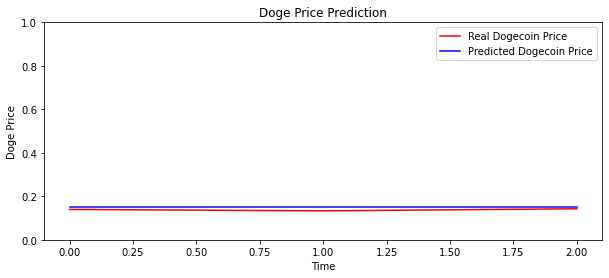

In [20]:
# Visualising the results
plt.figure(figsize=(10,4))
plt.plot(y_test[0:y_test.shape[0]-5], color = 'red', label = 'Real Dogecoin Price')
plt.plot(pred, color = 'blue', label = 'Predicted Dogecoin Price')
plt.title('Doge Price Prediction')
plt.xlabel('Time')
plt.ylabel('Doge Price')
plt.ylim(0,1)
plt.legend()
plt.show()